# The Price is Right: Airbnb Pricing Recommendation

### Importing packages and setting display options

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 200)

HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.output {
    display: flex;
    align-items: left;
    text-align: justify;
}

</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

In [729]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_column',None)

### Loading the data

In [427]:
df = pd.read_csv('dataset/finaldata.csv')
df.head(1)

url  rating type_airbnb  \
0  https://www.airbnb.com/rooms/39300057?previous...     NaN         hut   

   guests  number_of_beds  number_of_bedrooms  number_of_bathrooms  \
0       2               0                   1                  1.0   

   price_per_night  latitude  longitude  rating_cleanliness  rating_accuracy  \
0             1900   9.13261   123.6001                 NaN              NaN   

   rating_communication  rating_location  rating_checkin  rating_value  \
0                   NaN              NaN             NaN           NaN   

   population  area  travelers_2019  foreign_travelers  covid_total  \
0       95984   337          168366              85713           89   

   covid_active  superhost  host_identity_verified  waterfront  compactor  \
0            14          1                       0           0          0   

   security_cameras  sauna  parking  washing_machine  game_console  gym  \
0                 0      0        1                0             0    0   

   balcony  piano  swimming_pool  indoor_games  wifi  hair_dryer  hangers  \
0        1      0              0             0     1           0        1   

   bathtub  hot_water  iron  karaoke  safe  keypad  kitchen  kettle  tv  \
0        0          1     0        0     0       0        0       0   0   

   shampoo_conditioner  essentials  refrigerator  streaming_service  \
0                    1           0             0                  0   

   airconditioning  sound_system  oven  grill  baby_friendly  utensils  linen  \
0                1             0     0      0              0         0      1   

   bidet  breakfast  staff  alarm  fan  heating  child_friendly  \
0      0          0      0      0    0        1               0   

   clothes_storage  coffee_maker  dedicated_workspace  dining_table  dryer  \
0                0             0                    0             0      0   

   cooking_basics  elevator  beddings  garden  fire_extinguisher  firepit  \
0               0         0         0       0                  1        0   

   fireplace_guards  first_aid_kit  entire_home  enhanced_clean  \
0                 0              0            1               1   

   cancellation_policy  experienced_host  free_parking_on_premises  \
0                    1                 0                         0   

   great_checkin_experience  great_communication  great_location  \
0                         0                    0               0   

   highly_rated_host  house_rules  laptop_friendly_workspace  \
0                  0            1                          0   

   outstanding_hospitality  pets_allowed  self_checkin  sparkling_clean  \
0                        0             0             0                0   

   is_shared_room  is_private_room  num_nearby_listings  \
0               0                1                    1   

   num_nearby_tourist_spots_3km  num_nearby_tourist_spots_5km  \
0                             2                             5   

   num_nearby_malls_5km  num_nearby_supermarkets_3km  \
0                     0                            0   

   num_nearby_supermarkets_5km  num_nearby_restaurants_3km  \
0                            0                           0   

   num_nearby_restaurants_5km  num_nearby_public_transpo_5km  \
0                           2                              0   

   distance_airport_kms  province  Abra  Agusan del Norte  Agusan del Sur  \
0             39.603528  Siquijor     0                 0               0   

   Aklan  Albay  Antique  Apayao  Aurora  Bataan  Batanes  Batangas  Benguet  \
0      0      0        0       0       0       0        0         0        0   

   Biliran  Bohol  Bukidnon  Bulacan  Cagayan  Caloocan City  Camarines Norte  \
0        0      0         0        0        0              0                0   

   Camarines Sur  Camiguin  Capiz  Catanduanes  Cavite  Cebu  \
0              0         0      0            0       0     0   

   Compostela Valle

## Executive Summary

Last year, as with most other businesses, Airbnb was rocked by COVID-19. Multiple news about Airbnb's future headlined several articles as large numbers of cancellations and slow bookings created a massive loss in revenue globally but even more appalling is the situation of its hosts.

With the current situation, the collapse of startups has been prevalent during the pandemic. **Airbnb experienced a booking drop over 70% and cut its half in valuation.**

In the wake of the pandemic, emergence of **dynamic pricing** has become a business strategy for survival. With that our project aims to provide a data-driven pricing strategy by:

1. Identifying the factors affecting the price of listings
2. Train a Machine Learning Model that identifies a pricing system for PH Airbnb hosts to optimize their listing price

## Data Information

Our data contains available Airbnb listings together with their details ranging from price to various property types along with proximity analysis which is the calculated distance of an Airbnb listing to a spatial feature such as if the listing is nearby an airport, supermarkets and listings.

Data was acquired on March 26, 2021. **This model is a prototype for this specific timestamp** in order to take into account the price variability with respect to time. 

The following information was scraped from each listing:

1. Title

2. Location (province, latitude, and longitude)

3. Capacity Information (e.g. Number of guest, number of bedrooms)

4. Property Type (e.g. Entire apartment)

5. Price

6. Amenities

7. Description badges (e.g. Enhanced Clean)

8. Reviews (number only)

9. Ratings


### Spatial Distribution of Listings

A total of **11,409** listings in the Philippines were used in the analysis and regression. **Most of the listings are distributed along the coastline.**
The provinces with no Airbnb listings are **Tawi-tawi, Sulu and Basilan.**


<img src="datainfo.jpg" width="500">

In [741]:
df.shape

(11409, 218)

In [742]:
df.describe()

rating        guests  number_of_beds  number_of_bedrooms  \
count  6404.000000  11409.000000    11409.000000        11409.000000   
mean      4.715853      4.363660        2.565869            1.340082   
std       0.345744      3.416277        3.305330            1.633400   
min       0.000000      1.000000        0.000000            0.000000   
25%       4.620000      2.000000        1.000000            1.000000   
50%       4.800000      3.000000        2.000000            1.000000   
75%       4.920000      5.000000        3.000000            2.000000   
max       5.000000     16.000000       54.000000           30.000000   

       number_of_bathrooms  price_per_night      latitude     longitude  \
count         11409.000000      11409.00000  11409.000000  11409.000000   
mean              1.698659       2327.06153     12.776048    122.274236   
std               2.034653       3033.00194      3.168718      1.880816   
min               0.000000         30.00000      5.819620    117.432880   
25%               1.000000       1000.00000      9.943654    120.935900   
50%               1.000000       1500.00000     13.639479    121.422000   
75%               2.000000       2450.00000     14.660550    123.780340   
max              50.000000      48160.00000     20.787270    126.592940   

       rating_cleanliness  rating_accuracy  rating_communication  \
count         6402.000000      6403.000000           6403.000000   
mean             4.682021         4.736467              4.827237   
std              0.353694         0.327276              0.289801   
min              0.000000         0.000000              0.000000   
25%              4.600000         4.700000              4.800000   
50%              4.800000         4.800000              4.900000   
75%              4.900000         4.900000              5.000000   
max              5.000000         5.000000              5.000000   

       rating_location  rating_checkin  rating_value    population  \
count      6403.000000     6403.000000   6403.000000  1.140900e+04   
mean          4.706216        4.835561      4.733234  3.381216e+06   
std           0.342791        0.273873      0.315834  4.291677e+06   
min           0.000000        0.000000      0.000000  1.724600e+04   
25%           4.600000        4.800000      4.700000  7.804810e+05   
50%           4.800000        4.900000      4.800000  1.564459e+06   
75%           4.900000        5.000000      4.900000  3.035081e+06   
max           5.000000        5.000000      5.000000  1.287725e+07   

               area  travelers_2019  foreign_travelers    covid_total  \
count  11409.000000    1.140900e+04       1.140900e+04   11409.000000   
mean    3436.463669    1.031431e+06       3.539016e+05   46272.370322   
std     3124.286873    1.014455e+06       6.100547e+05   88305.413940   
min      219.000000    0.000000e+00       0.000000e+00       3.000000   
25%     1372.000000    1.785660e+05       6.804000e+03    1443.000000   
50%     2796.000000    6.757890e+05       3.161600e+04    4231.000000   
75%     4820.000000    1.559166e+06       4.111540e+05   24342.000000   
max    17030.000000    3.037100e+06       1.709157e+06  246832.000000   

       covid_active     superhost  host_identity_verified    waterfront  \
count  11409.000000  11409.000000            11409.000000  11409.000000   
mean    4242.936103      0.215619                0.647384      0.038478   
std     8350.271957      0.411269                0.477805      0.192357   
min        0.000000      0.000000                0.000000      0.000000   
25%       80.000000      0.000000                0.000000      0.000000   
50%      260.000000      0.000000                1.000000      0.000000   
75%     1307.000000      0.000000                1.000000      0.000000   
max    23160.000000      1.000000                1.000000      1.000000   

          compactor  security_cameras         sauna       parking  \
count  11409.000000      11409.000000  1

In [743]:
# Number of listings per province
df.groupby("province").agg({'url':'count'}).sort_values(by="url", ascending=False).reset_index()[:10]

province  url
0               Cebu  448
1        Quezon City  406
2           Pampanga  394
3      Davao del Sur  365
4   Misamis Oriental  317
5        Makati City  305
6            Benguet  302
7              Aklan  298
8            Palawan  297
9  Surigao del Norte  287

#### Function used for plotting

In [744]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['#ff5a5f', '#00a698'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price_per_night.median().plot(kind='bar', ax=ax2, color=['#ff5a5f', '#00a698'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (PHP)')
    ax2.set_xlabel('')
    
    plt.show()

### Price per Night

Mean price is 2327.06153. Median price is 1500.00000. Data is skewed to the right.
Range of price is 30php-48160php.

C:\Users\Edward Apostol\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price per night (in PHP)')

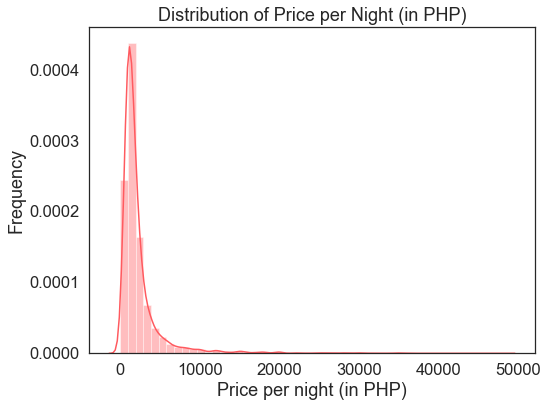

In [745]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['price_per_night'], color='#ff5a5f', ax=ax)
plt.title("Distribution of Price per Night (in PHP)")
plt.ylabel('Frequency')
plt.xlabel("Price per night (in PHP)")

In [746]:
df['price_per_night'].describe()

count    11409.00000
mean      2327.06153
std       3033.00194
min         30.00000
25%       1000.00000
50%       1500.00000
75%       2450.00000
max      48160.00000
Name: price_per_night, dtype: float64

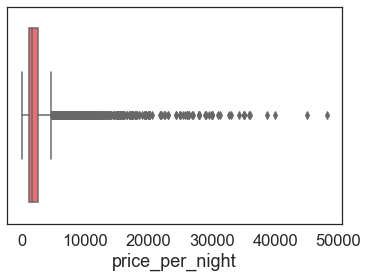

In [747]:
ax = sns.boxplot(x=df["price_per_night"], color='#ff5a5f')

In [748]:
# Top 3 most expensive listings
df.sort_values('price_per_night', ascending=False)[:3]

url  rating  \
8134   https://www.airbnb.com/rooms/44920938?previous...     NaN   
10992  https://www.airbnb.com/rooms/47722659?previous...     NaN   
8486   https://www.airbnb.com/rooms/48248629?previous...     NaN   

                             type_airbnb  guests  number_of_beds  \
8134   private room in bed and breakfast      16               9   
10992                       entire villa       8               4   
8486              private room in resort      16              16   

       number_of_bedrooms  number_of_bathrooms  price_per_night  latitude  \
8134                    6                  8.0            48160  15.17165   
10992                   4                  4.0            45000  11.96480   
8486                    6                  6.0            40000  13.86474   

       longitude  rating_cleanliness  rating_accuracy  rating_communication  \
8134   120.03430                 NaN              NaN                   NaN   
10992  121.92520                 NaN              NaN                   NaN   
8486   120.63181                 NaN              NaN                   NaN   

       rating_location  rating_checkin  rating_value  population  area  \
8134               NaN             NaN           NaN      823888  3830   
10992              NaN             NaN           NaN      574823  1821   
8486               NaN             NaN           NaN     2694335  3119   

       travelers_2019  foreign_travelers  covid_total  covid_active  \
8134           850240              76644         2462           100   
10992          217367              24693         1143           180   
8486          2164183             136148        14911           651   

       superhost  host_identity_verified  waterfront  compactor  \
8134           0                       1           0          0   
10992          0                       1           1          0   
8486           0                       1           0          0   

       security_cameras  sauna  parking  washing_machine  game_console  gym  \
8134                  0      0        1                0             0    0   
10992                 1      0        0                1             0    0   
8486                  0      0        1                0             0    0   

       balcony  piano  swimming_pool  indoor_games  wifi  hair_dryer  hangers  \
8134         0      0              1             0     1           1        1   
10992        1      0              1             0     1           1        1   
8486         0      0              1             0     1           0        1   

       bathtub  hot_water  iron  karaoke  safe  keypad  kitchen  kettle  tv  \
8134         1          0     0        0     0       0        1       0   1   
10992        0          1     1        0     0       0        1       0   1   
8486         0          0     1        0     0       0        1       0   1   

       shampoo_conditioner  essentials  refrigerator  streaming_service  \
8134                     1           0             1                  0   
10992                    1           1             1                  0   
8486                     1           0             0                  0   

       airconditioning  sound_system  oven  grill  baby_friendly  utensils  \
8134                 1             0     1      0              0         1   
10992                1             0     1      0              1         1   
8486                 1             0     0      0              0         1   

       linen  bidet  breakfast  staff  alarm  fan  heating  child_friendly  \
8134       0      0          1      0      1    0        1               0   
10992      1      0          0      1      0    0        0               0   
8486       0      0          0      1      0    0        1               0   

       clothes_storage  coffee_maker  dedicated_workspace  dining_table  \
8134                 0             0                    1            

In [749]:
# Top 3 least expensive listings
df.sort_values('price_per_night')[:3]

url  rating  \
797   https://www.airbnb.com/rooms/41343254?previous...     NaN   
3044  https://www.airbnb.com/rooms/39373451?previous...     NaN   
9445  https://www.airbnb.com/rooms/18689234?previous...     5.0   

                            type_airbnb  guests  number_of_beds  \
797                shared room in house       8               4   
3044                       entire house       3               0   
9445  private room in bed and breakfast       2               2   

      number_of_bedrooms  number_of_bathrooms  price_per_night  latitude  \
797                    1                  4.0               30  11.02815   
3044                   1                  0.0               50   8.93414   
9445                   1                  1.0               53   9.95144   

      longitude  rating_cleanliness  rating_accuracy  rating_communication  \
797   125.73002                 NaN              NaN                   NaN   
3044  125.52546                 NaN              NaN                   NaN   
9445  123.36644                 5.0              5.0                   4.9   

      rating_location  rating_checkin  rating_value  population  area  \
797               NaN             NaN           NaN      467160  4660   
3044              NaN             NaN           NaN      691566  3546   
9445              5.0             5.0           5.0     4632359  5342   

      travelers_2019  foreign_travelers  covid_total  covid_active  superhost  \
797            76976                912         1265            27          0   
3044           73010                 75         3605           200          0   
9445         1088938             443293        42245          5409          0   

      host_identity_verified  waterfront  compactor  security_cameras  sauna  \
797                        0           0          0                 0      0   
3044                       0           0          0                 0      0   
9445                       1           0          0                 0      0   

      parking  washing_machine  game_console  gym  balcony  piano  \
797         0                0             0    0        0      0   
3044        1                0             0    0        0      0   
9445        0                0             0    0        1      0   

      swimming_pool  indoor_games  wifi  hair_dryer  hangers  bathtub  \
797               0             0     0           0        1        0   
3044              0             0     0           0        1        0   
9445              0             0     1           1        1        0   

      hot_water  iron  karaoke  safe  keypad  kitchen  kettle  tv  \
797           0     0        0     0       0        1       0   0   
3044          0     0        0     0       0        1       0   0   
9445          1     0        0     0       0        0       0   0   

      shampoo_conditioner  essentials  refrigerator  streaming_service  \
797                     0           0             0                  0   
3044                    0           0             0                  0   
9445                    1           0             1                  0   

      airconditioning  sound_system  oven  grill  baby_friendly  utensils  \
797                 0             0     0      0              0         0   
3044                1             0     0      0              0         0   
9445                1             0     0      0              0         0   

      linen  bidet  breakfast  staff  alarm  fan  heating  child_friendly  \
797       0      0          0      0      0    0        0               0   
3044      0      0          0      0      0    0        0               0   
9445      1      0          1      1      1    0        0               0   

      clothes_storage  coffee_maker  dedicated_workspace  dining_table  dryer  \
797                 0             0                    0             0      0   
3044                0            

### GBBB - Number of Guests, Number of Bedrooms, Number of Beds, Number of Toilet

#### Number of Guests

The most frequent number guests is 2, followed by 4.
As the number of price increases, median price of listings generally increases.


In [808]:
df1 = df.groupby('guests').agg({'price_per_night':'median','url':'count'}).reset_index()
df1.head()

guests  price_per_night   url
0       1            700.0   270
1       2           1200.0  4223
2       3           1360.0  1370
3       4           1540.0  2393
4       5           1800.0   547

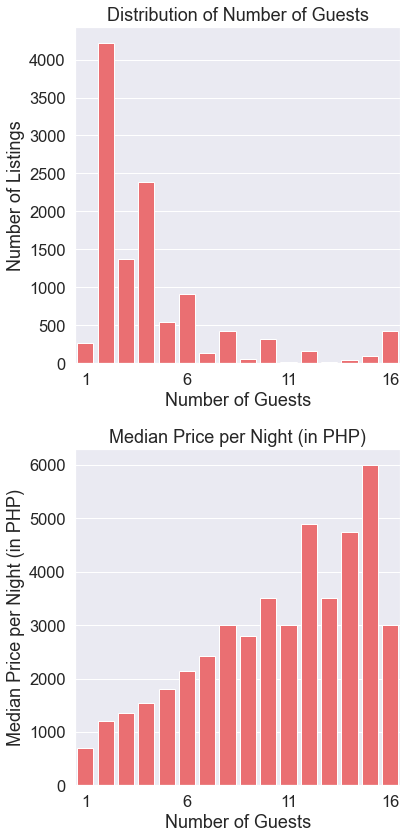

In [809]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['url'], 
    x=df1['guests'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Guests')
ax1.set_xlabel('Number of Guests')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price_per_night'], 
    x=df1['guests'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night (in PHP)')
ax2.set_xlabel('Number of Guests')
ax2.set_ylabel('Median Price per Night (in PHP)')

fig.tight_layout()

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

#### Number of Beds

In [810]:
df1 = df.groupby('number_of_beds').agg({'price_per_night':'median','url':'count'}).reset_index()
df1.head()

number_of_beds  price_per_night   url
0               0           1264.0   676
1               1           1212.0  4327
2               2           1500.0  3121
3               3           1800.0  1190
4               4           2371.5   746

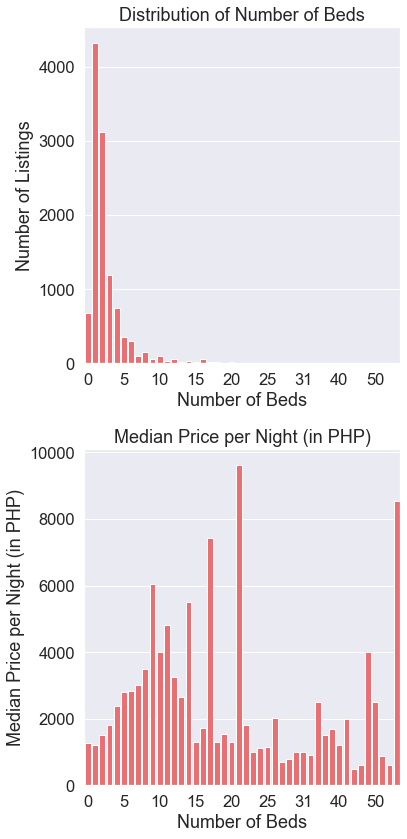

In [811]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['url'], 
    x=df1['number_of_beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

ax1.set_title('Distribution of Number of Beds')
ax1.set_xlabel('Number of Beds')
ax1.set_ylabel('Number of Listings')

plot = sns.barplot(
    y=df1['price_per_night'], 
    x=df1['number_of_beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night (in PHP)')
ax2.set_xlabel('Number of Beds')
ax2.set_ylabel('Median Price per Night (in PHP)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.tight_layout()

#### Number of Bedrooms

In [812]:
df1 = df.groupby('number_of_bedrooms').agg({'price_per_night':'median','url':'count'}).reset_index()
df1.head()

number_of_bedrooms  price_per_night   url
0                   0           1250.0  2329
1                   1           1400.0  6182
2                   2           1999.0  1645
3                   3           3449.0   599
4                   4           4000.0   296

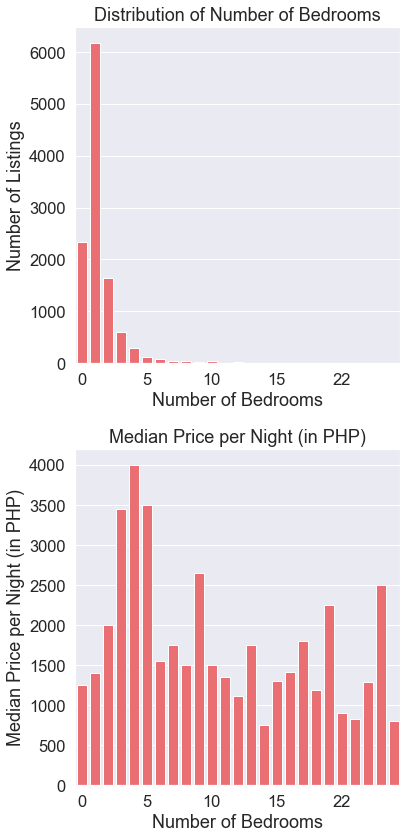

In [813]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['url'], 
    x=df1['number_of_bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price_per_night'], 
    x=df1['number_of_bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night (in PHP)')
ax2.set_xlabel('Number of Bedrooms')
ax2.set_ylabel('Median Price per Night (in PHP)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

#### Number of Bathrooms

In [814]:
df1 = df.groupby('number_of_bathrooms').agg({'price_per_night':'median','url':'count'}).reset_index()
df1['number_of_bathrooms'] = df1['number_of_bathrooms'].round().astype('int64')
df1.head()

number_of_bathrooms  price_per_night   url
0                    0           1460.0   365
1                    0            900.0    19
2                    1           1388.0  7254
3                    2           1457.0   548
4                    2           1699.0  1587

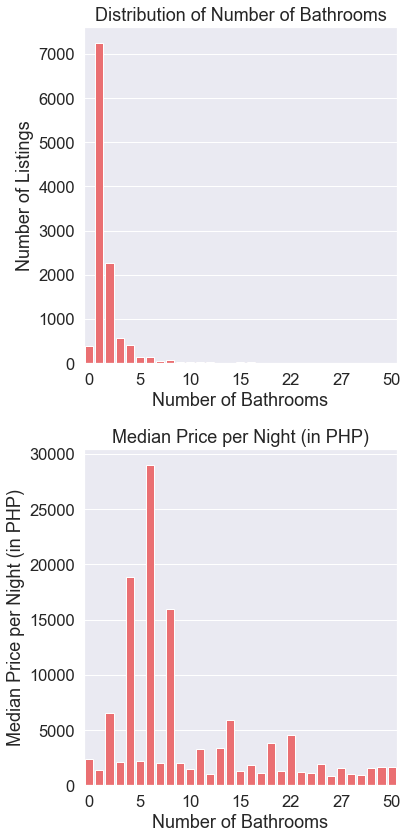

In [815]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['url'], 
    x=df1['number_of_bathrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price_per_night'], 
    x=df1['number_of_bathrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night (in PHP)')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Median Price per Night (in PHP)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

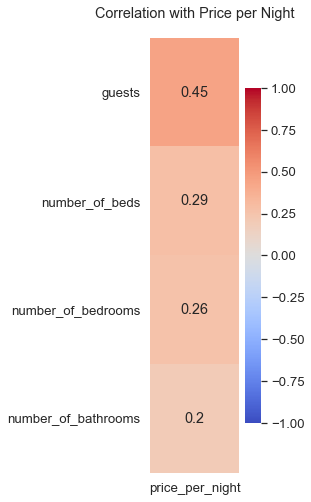

In [818]:
sns.set(font_scale = 1.2)

# Compute correlations
corr = df[['price_per_night','guests', 'number_of_bedrooms','number_of_bathrooms',
          'number_of_beds']].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 8))
ax.set_title('Correlation with Price per Night', pad='20')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False)[1:],
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True);

### Provinces

In [759]:
df1 = df.groupby("province").agg({'url':'count', 'price_per_night':'median'}).reset_index()
df1[:5]

province  url  price_per_night
0              Abra   10           2247.5
1  Agusan del Norte  132           1777.5
2    Agusan del Sur    9            850.0
3             Aklan  298           2000.0
4             Albay  275           1500.0

In [760]:
df1.to_csv('province_median.csv', index=False)

In [761]:
# Top 5 provinces with highest price_per_night (where count of listings>10)
df2 = df1[df1['url'] >= 10].sort_values(by="price_per_night", ascending=False).reset_index()[:5]
df2

index    province  url  price_per_night
0     10    Batangas  264           4435.5
1      8      Bataan  183           4050.0
2     52  Marinduque   46           2700.0
3      9     Batanes  188           2700.0
4     91    Zambales  277           2500.0

In [762]:
# Top 5 provinces with lowest price_per_night (where count of listings>10)
df3 = df1[df1['url'] >= 10].sort_values(by="price_per_night").reset_index()[:5]
df3[:5]

index           province  url  price_per_night
0     17      Caloocan City   17            900.0
1     24               Cebu  448            908.0
2     94  Zamboanga del Sur   41           1008.0
3     66            Palawan  297           1050.0
4     33           Guimaras   36           1057.0

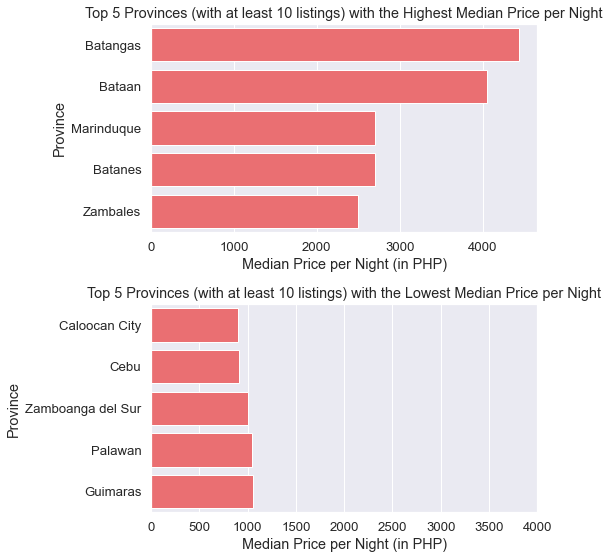

In [763]:
sns.set(font_scale = 1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot a bar chart
sns.barplot(
    y=df2['province'], 
    x=df2['price_per_night'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Provinces (with at least 10 listings) with the Highest Median Price per Night')
ax1.set_xlabel('Median Price per Night (in PHP)')
ax1.set_ylabel('Province')

sns.barplot(
    y=df3['province'], 
    x=df3['price_per_night'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Top 5 Provinces (with at least 10 listings) with the Lowest Median Price per Night')
ax2.set_xlabel('Median Price per Night (in PHP)')
ax2.set_ylabel('Province')
ax2.set_xlim(0,4000)

fig.tight_layout()

<img src="Map1Average.jpg" width="350">

<img src="Map2Numlistings.jpg" width="350">

<img src="Airbnb_distribution_PH.jpg" width="350">

### Distances from Airport, Tourist Spots, Transport Terminals, Highways, Coast, Supermarket, Restaurants, Terminals

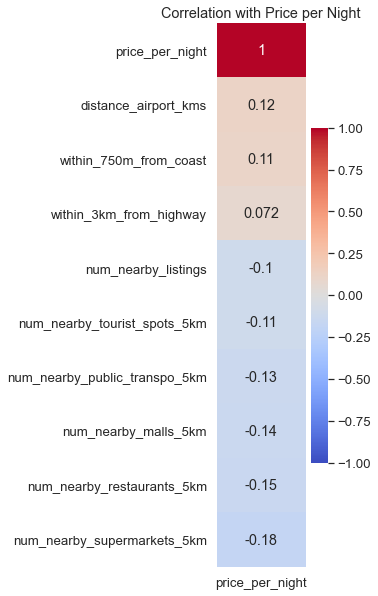

In [764]:
# Compute correlations
corr = df[['price_per_night','num_nearby_listings', 'within_3km_from_highway','within_750m_from_coast',
          'num_nearby_tourist_spots_5km', 'num_nearby_malls_5km', 'num_nearby_supermarkets_5km',
          'num_nearby_restaurants_5km', 'num_nearby_public_transpo_5km', 'distance_airport_kms']].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 10))
ax.set_title('Correlation with Price per Night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Pearson Correlation test to check if the correlations above are significant (α=0.05)

In [765]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
     return pearsonr(x,y)[1]
    
corr = df[['price_per_night','num_nearby_listings', 'within_3km_from_highway','within_750m_from_coast',
          'num_nearby_tourist_spots_5km', 'num_nearby_malls_5km', 'num_nearby_supermarkets_5km',
          'num_nearby_restaurants_5km', 'num_nearby_public_transpo_5km', 'distance_airport_kms']].corr(method=pearsonr_pval)
corr['significant'] = corr['price_per_night'] < 0.05
corr[['price_per_night', 'significant']]

price_per_night  significant
price_per_night                   1.000000e+00        False
num_nearby_listings               9.132172e-28         True
within_3km_from_highway           1.541084e-14         True
within_750m_from_coast            3.345644e-34         True
num_nearby_tourist_spots_5km      2.180874e-30         True
num_nearby_malls_5km              7.632618e-48         True
num_nearby_supermarkets_5km       1.784399e-82         True
num_nearby_restaurants_5km        1.642817e-56         True
num_nearby_public_transpo_5km     1.314829e-41         True
distance_airport_kms              1.119067e-37         True

### Type of Airbnb

In [766]:
# Top 5 most expensive Airbnb types
df1 = df.groupby("type_airbnb").agg({'price_per_night':'median','url':'count'}).sort_values(by="price_per_night", ascending=False).reset_index()
df1[:5]

type_airbnb  price_per_night  url
0             houseboat          20000.0    1
1  private room in cave          12163.0    1
2          entire villa           8900.0  224
3                  boat           8800.0    4
4            dome house           8040.5    6

In [767]:
# Top 5 most expensive Airbnb types with more than 10 listings
df2 = df1[df1['url']>10].sort_values(by="price_per_night", ascending=False)[:5]
df2

type_airbnb  price_per_night  url
2             entire villa           8900.0  224
10               farm stay           3999.0   73
13            entire cabin           3490.0   49
15                campsite           3066.0   27
18  private room in island           2844.5   30

In [768]:
# Top 5 least expensive Airbnb types with more than 10 listings
df3 = df1[df1['url']>10].sort_values(by="price_per_night")[:5]
df3

type_airbnb  price_per_night  url
90        shared room in guest house            518.0   11
86              shared room in house            554.0   41
84             shared room in hostel            600.0   35
83          shared room in apartment            679.5   16
78  shared room in bed and breakfast            800.0   30

Least expensive are all shared rooms

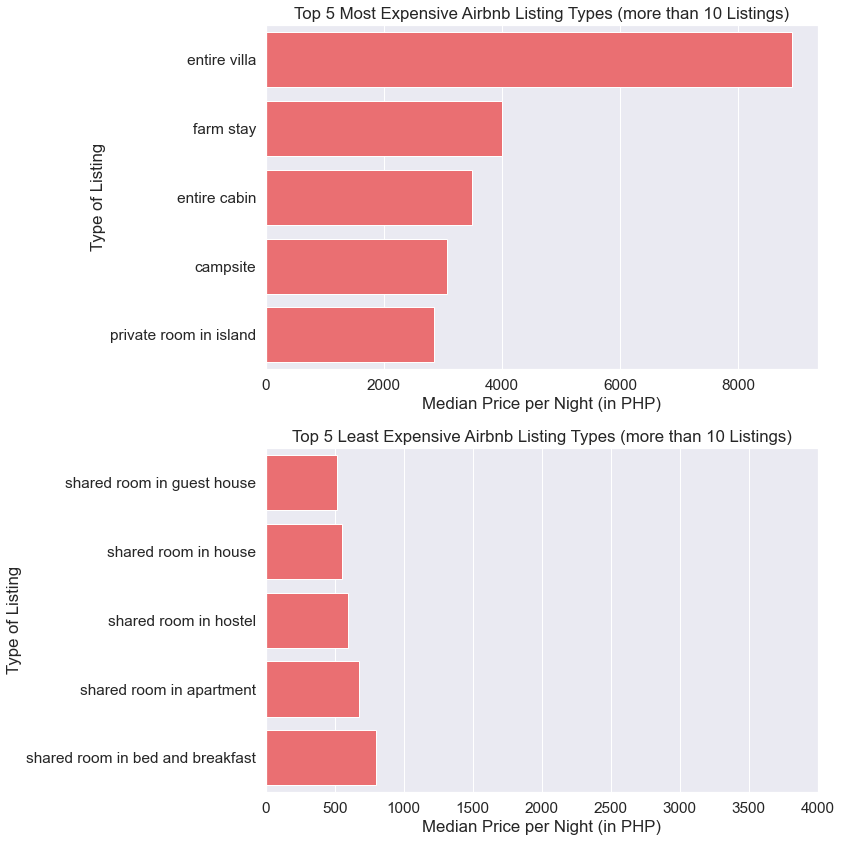

In [769]:
sns.set(font_scale = 1.4)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot a bar chart
sns.barplot(
    y=df2['type_airbnb'], 
    x=df2['price_per_night'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Most Expensive Airbnb Listing Types (more than 10 Listings)')
ax1.set_xlabel('Median Price per Night (in PHP)')
ax1.set_ylabel('Type of Listing')

sns.barplot(
    y=df3['type_airbnb'], 
    x=df3['price_per_night'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Top 5 Least Expensive Airbnb Listing Types (more than 10 Listings)')
ax2.set_xlabel('Median Price per Night (in PHP)')
ax2.set_ylabel('Type of Listing')
ax2.set_xlim(0,4000)

fig.tight_layout()

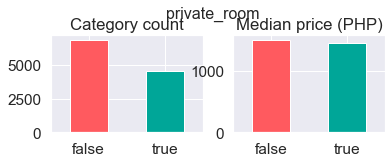

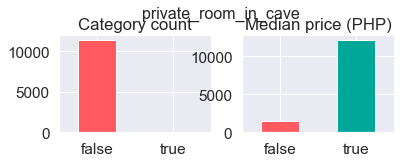

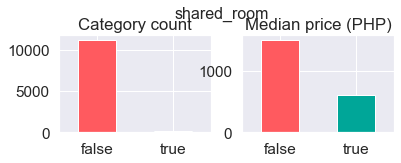

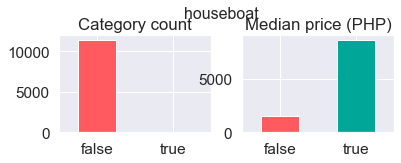

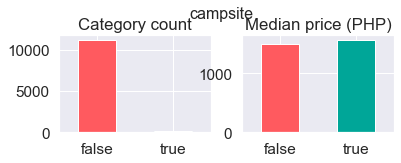

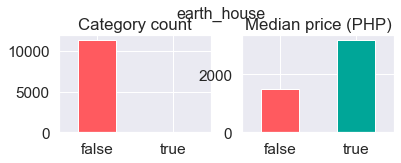

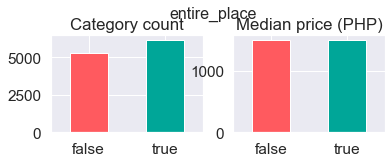

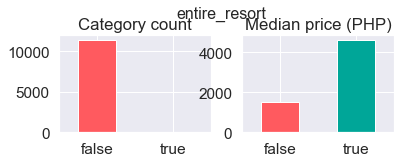

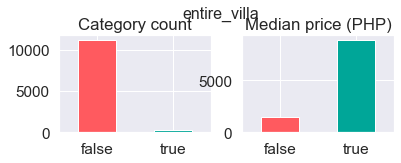

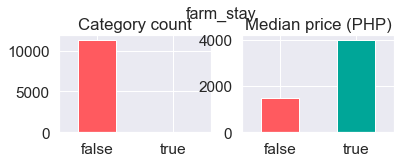

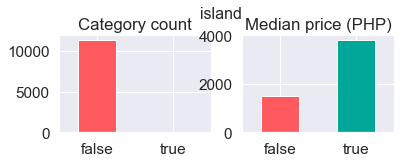

In [770]:
for col in df.loc[:,"private_room":"island"].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

### Room Type (Private or Shared)

In [819]:
df4 = df[["is_shared_room","is_private_room", "entire_home"]].sum().sort_values(ascending=False).to_frame().reset_index()
df4

index      0
0  is_private_room  11202
1      entire_home   6523
2   is_shared_room    207

In [820]:
df[df['is_shared_room']==1]['price_per_night'].median()

600.0

In [821]:
df[df['is_private_room']==1]['price_per_night'].median()

1500.0

In [824]:
df[df['entire_home']==1]['price_per_night'].median()

1500.0

In [822]:
df8 = {'room_type': ['is_shared_room', 'is_private_room', 'entire_home'], 'median_price': [600.0, 1500.0, 1500.00],
      'count': [207, 11202]}
df8 = pd.DataFrame(data=df8)
df8

room_type  median_price  count
0   is_shared_room         600.0    207
1  is_private_room        1500.0  11202

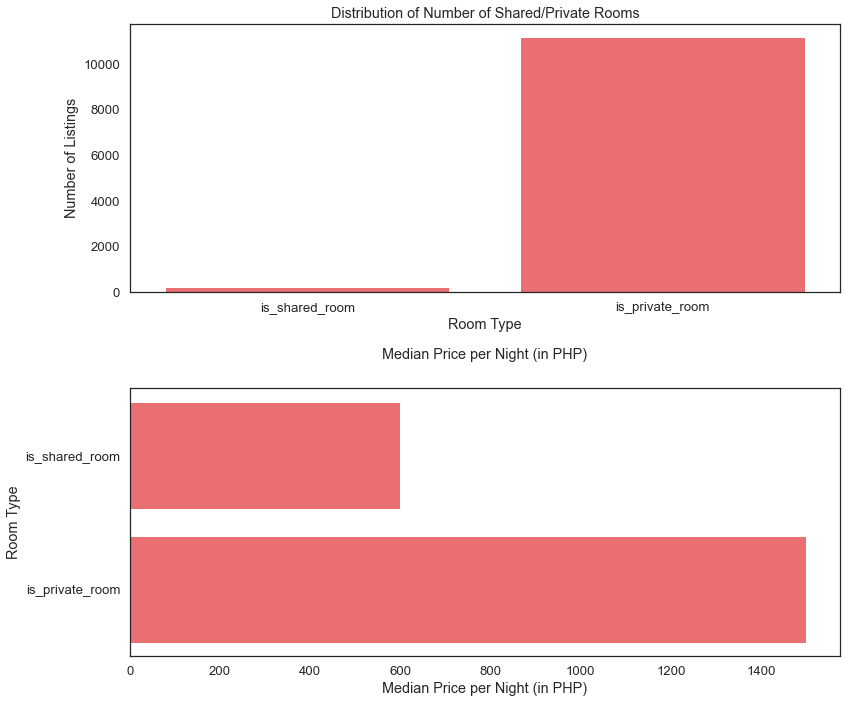

In [823]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# plot a bar chart
sns.barplot(
    x=df8['room_type'], 
    y=df8['count'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Shared/Private Rooms')
ax1.set_ylabel('Number of Listings')
ax1.set_xlabel('Room Type')

sns.barplot(
    y=df8['room_type'], 
    x=df8['median_price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night (in PHP)', pad=30)
ax2.set_xlabel('Median Price per Night (in PHP)')
ax2.set_ylabel('Room Type')

fig.tight_layout()

### Amenities

In [776]:
# Top 10 most common amenities
df.loc[:,"waterfront":"first_aid_kit"].sum().sort_values(ascending=False)[0:10]

airconditioning        9507
parking                9105
tv                     8612
wifi                   8565
hangers                8270
kitchen                8187
fire_extinguisher      7091
shampoo_conditioner    7062
dedicated_workspace    6560
hot_water              6112
dtype: int64

In [777]:
# Top 10 least common amenities
df.loc[:,"waterfront":"first_aid_kit"].sum().sort_values(ascending=True)[0:12]

karaoke               2
sauna                 5
piano                13
firepit              30
compactor            33
indoor_games         33
sound_system        111
game_console        129
keypad              190
fireplace_guards    211
safe                231
bathtub             235
dtype: int64

<AxesSubplot:>

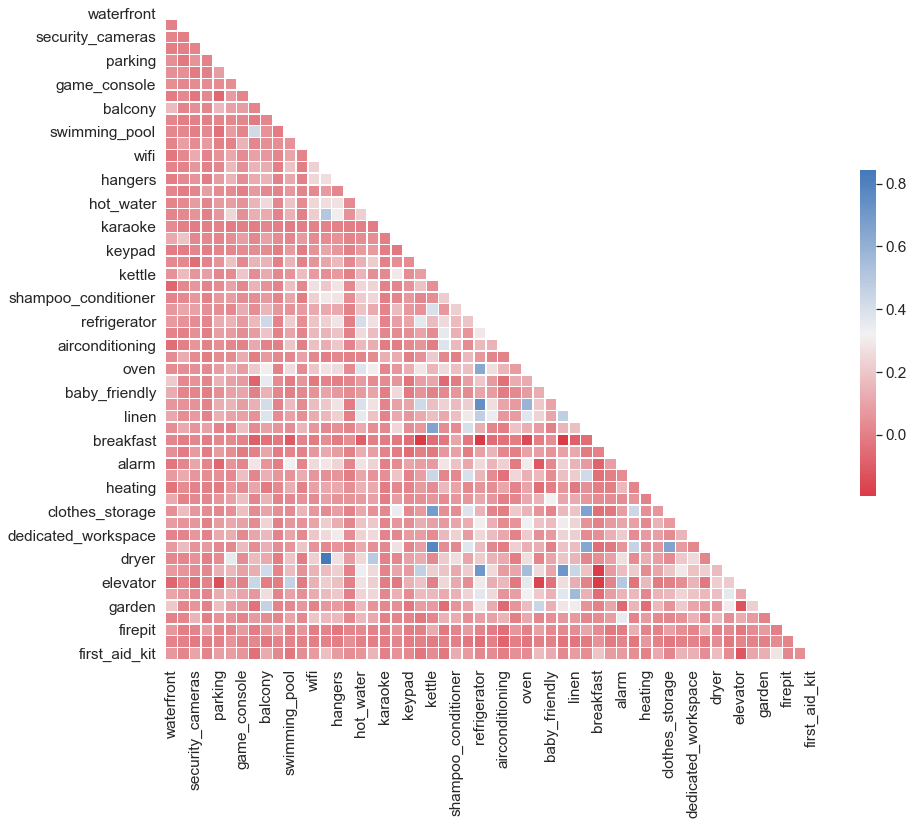

In [778]:
# Compute correlations
corr = df.loc[:,'waterfront':'first_aid_kit'].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

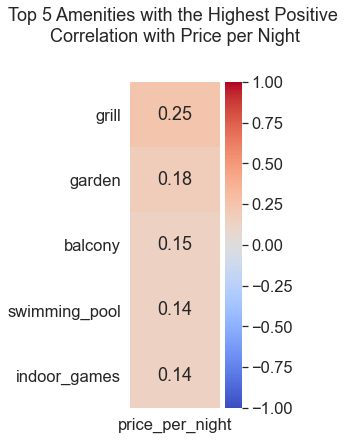

In [779]:
sns.set(font_scale = 1.5)
# Compute correlations
corr = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr()
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 6))
ax.set_title('Top 5 Amenities with the Highest Positive \nCorrelation with Price per Night', pad=40)

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False)[1:6],
            vmin=-1,vmax=1,
            cmap='coolwarm',
            annot=True);

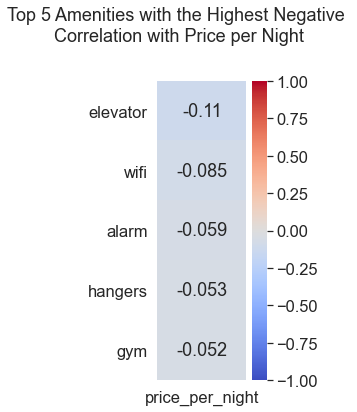

In [780]:
sns.set(font_scale = 1.5)
# Compute correlations
corr = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr()
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 5.5))
title = ax.set_title('Top 5 Amenities with the Highest Negative \nCorrelation with Price per Night',pad=40)
title.set_position([.24, 1.61])


# Add diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'])[0:5],
            vmin=-1,vmax=1,
            cmap='coolwarm',
            annot=True);

In [781]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
     return pearsonr(x,y)[1]
    
corr = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr(method=pearsonr_pval)
corr['significant'] = corr['price_per_night'] < 0.05
corr[['price_per_night', 'significant']]

price_per_night  significant
waterfront              6.066117e-33         True
compactor               4.388571e-01        False
security_cameras        1.226006e-06         True
sauna                   5.303457e-06         True
parking                 9.783815e-14         True
washing_machine         4.851984e-01        False
game_console            6.703500e-06         True
gym                     3.012779e-08         True
balcony                 2.297033e-56         True
piano                   9.693627e-01        False
swimming_pool           4.036132e-50         True
indoor_games            2.719676e-49         True
wifi                    5.900709e-20         True
hair_dryer              1.599332e-04         True
hangers                 1.682427e-08         True
bathtub                 8.845638e-37         True
hot_water               2.026952e-03         True
iron                    1.614256e-02         True
karaoke                 6.754374e-01        False
safe                    3.042013e-01        False
keypad                  1.548152e-02         True
kitchen                 6.456463e-19         True
kettle                  1.580323e-04         True
tv                      1.461224e-02         True
shampoo_conditioner     3.013564e-01        False
essentials              3.408008e-03         True
refrigerator            6.277694e-10         True
streaming_service       3.687343e-02         True
airconditioning         1.293413e-08         True
sound_system            1.458256e-15         True
oven                    4.641062e-13         True
grill                  7.567286e-160         True
baby_friendly           6.270325e-10         True
utensils                2.798509e-06         True
linen                   1.579151e-04         True
bidet                   7.178186e-04         True
breakfast               5.920897e-10         True
staff                   1.185190e-10         True
alarm                   2.610887e-10         True
fan                     8.451070e-16         True
heating                 5.695118e-01        False
child_friendly          9.735372e-11         True
clothes_storage         1.514905e-01        False
coffee_maker            2.352490e-28         True
dedicated_workspace     5.835162e-01        False
dining_table            6.322163e-09         True
dryer                   1.185085e-02         True
cooking_basics          1.273207e-17         True
elevator                6.894777e-35         True
beddings                6.087648e-05         True
garden                  1.093750e-80         True
fire_extinguisher       1.002473e-06         True
firepit                 3.014301e-25         True
fireplace_guards        5.903025e-03         True
first_aid_kit           5.235540e-49         True
price_per_night         1.000000e+00        False

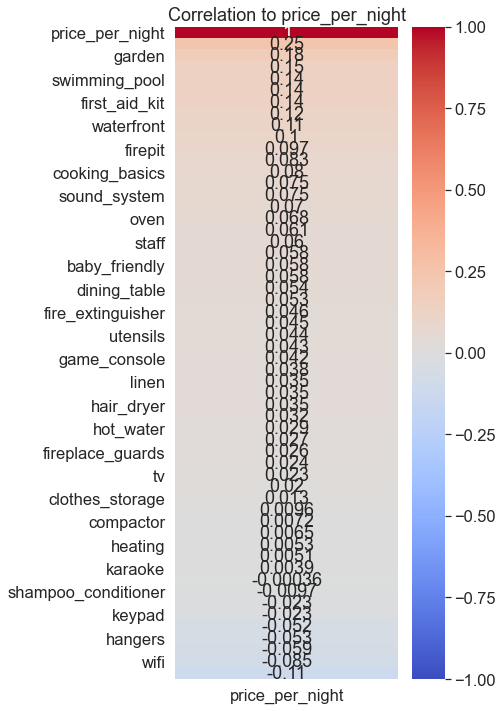

In [782]:
# Compute correlations
corr = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr()
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 12))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [783]:
significant_positive = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr().sort_values(by=['price_per_night'],ascending=False)[0:40]
not_significant = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr().sort_values(by=['price_per_night'],ascending=False)[40:49]
significant_negative = pd.concat([df.loc[:,'waterfront':'first_aid_kit'],df['price_per_night']], axis=1).corr().sort_values(by=['price_per_night'],ascending=False)[49:]

Clothes storage until iron are not significant

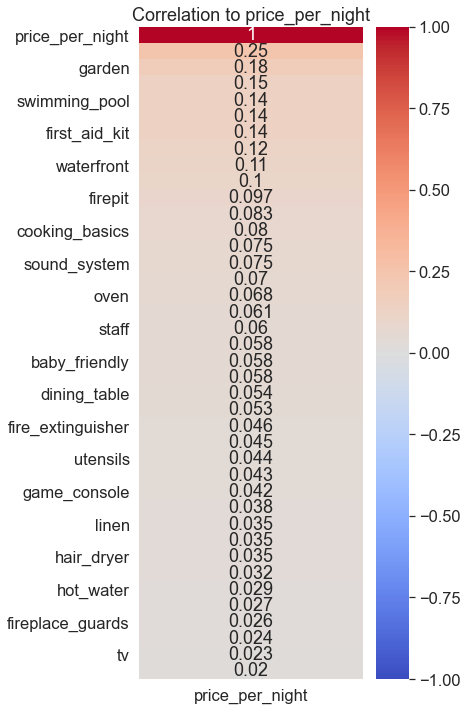

In [784]:
# Compute correlations
corr = significant_positive
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 12))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True);

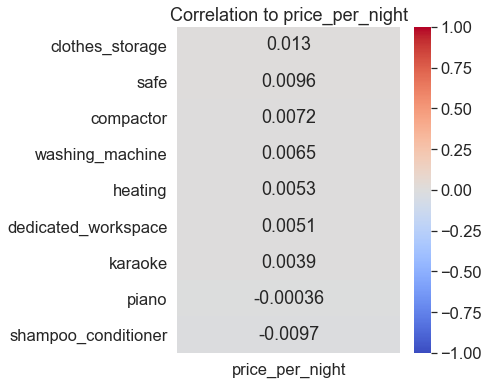

In [785]:
# Compute correlations
corr = not_significant
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,vmax=1,
            cmap='coolwarm',
            annot=True);

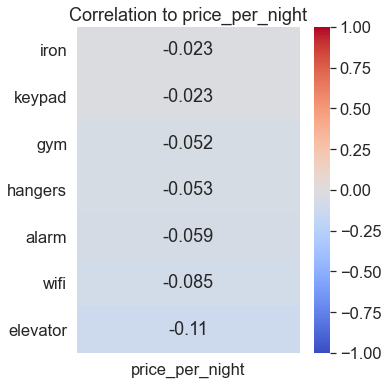

In [786]:
# Compute correlations
corr = significant_negative
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,vmax=1,
            cmap='coolwarm',
            annot=True);

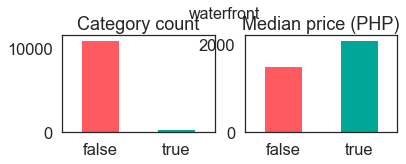

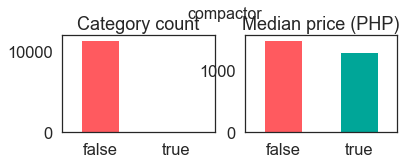

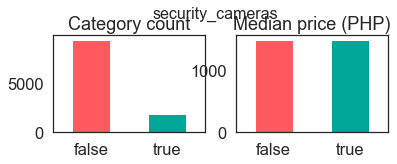

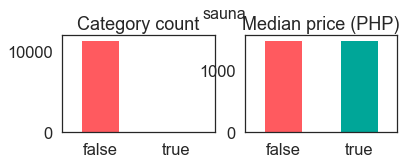

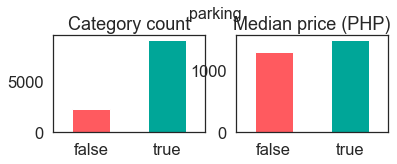

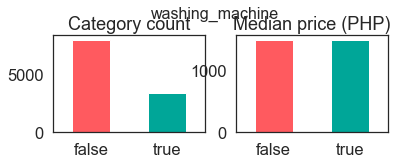

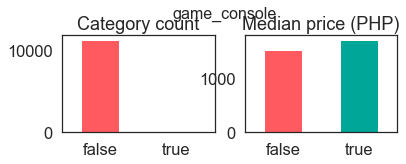

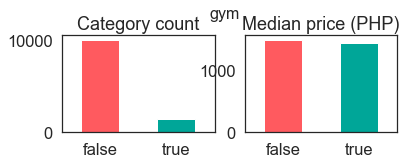

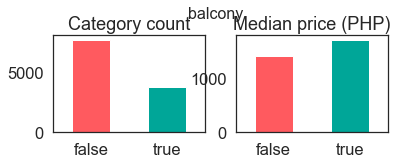

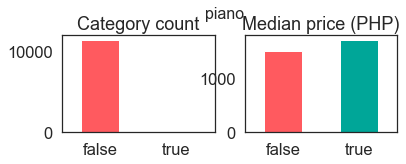

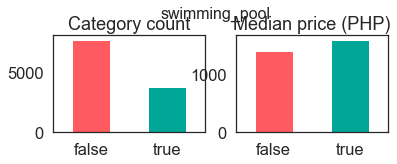

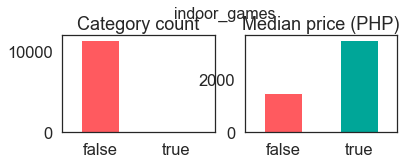

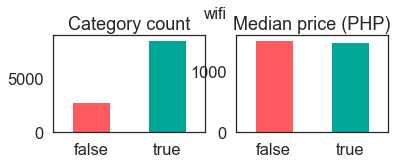

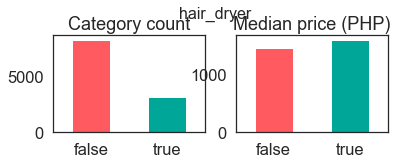

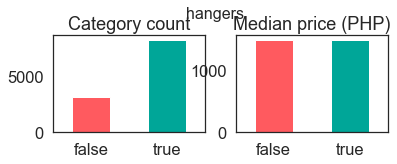

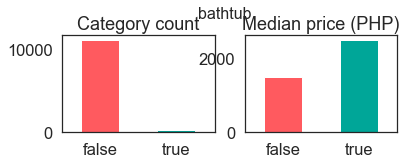

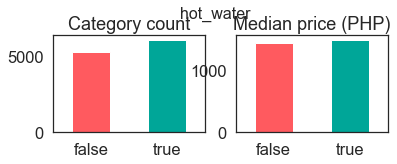

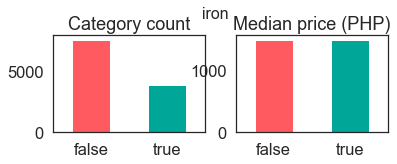

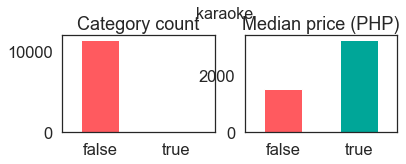

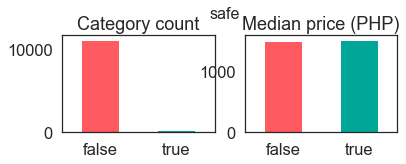

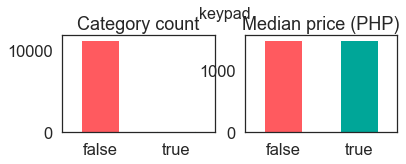

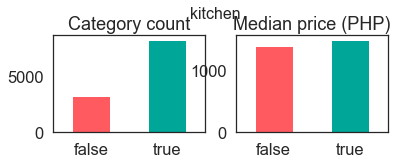

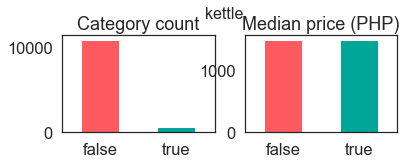

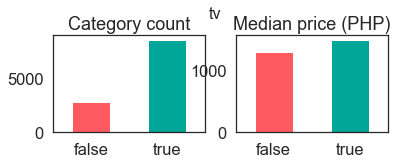

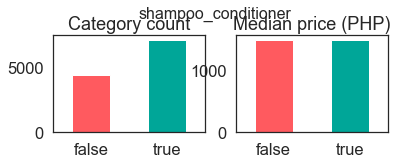

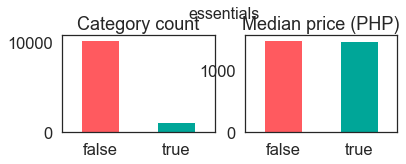

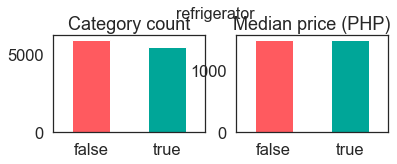

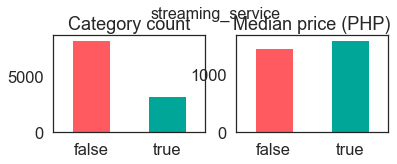

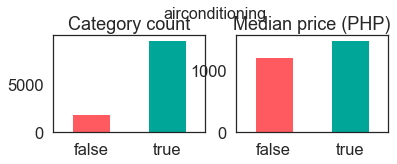

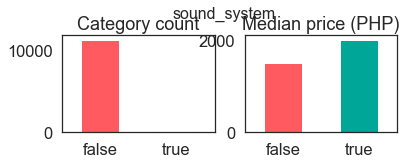

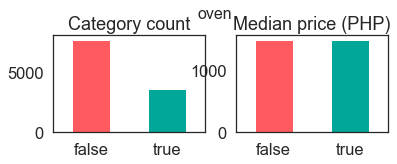

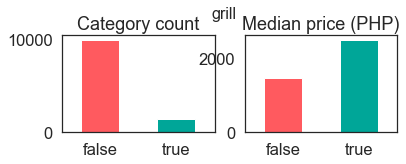

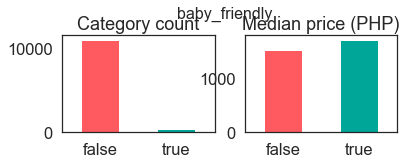

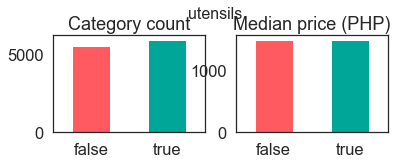

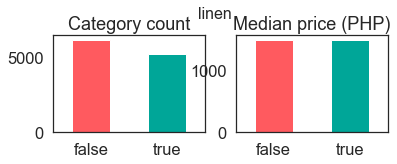

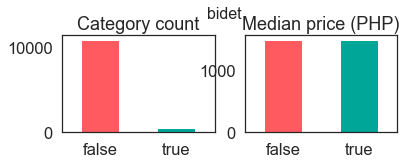

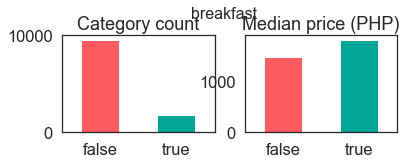

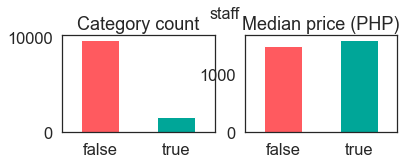

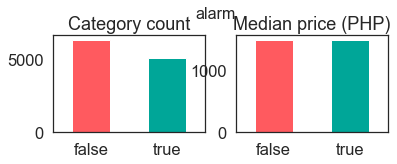

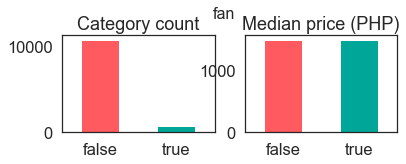

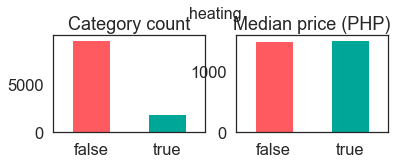

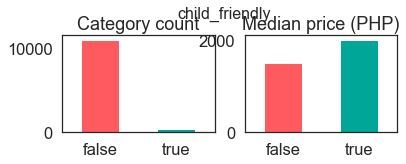

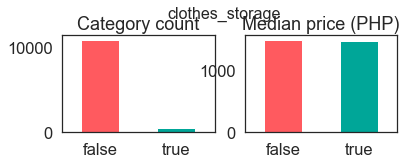

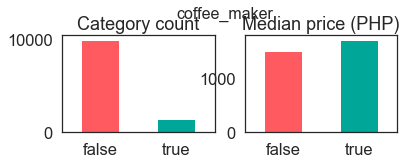

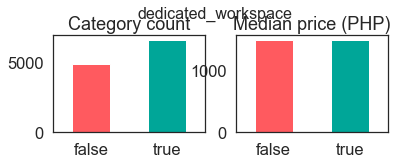

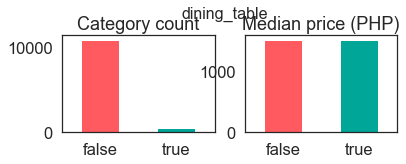

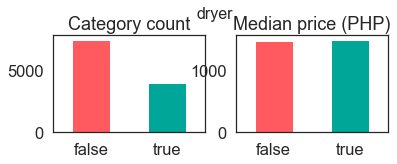

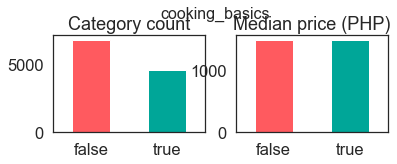

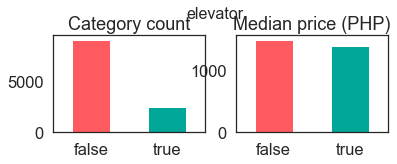

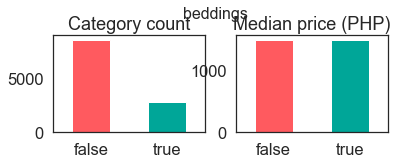

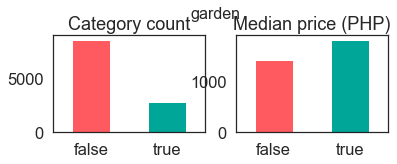

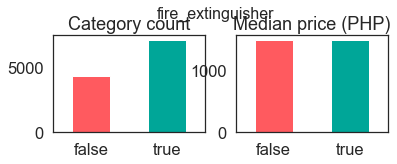

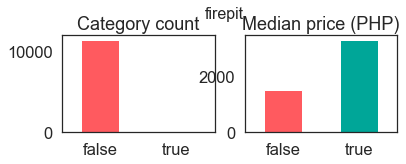

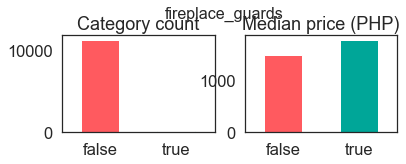

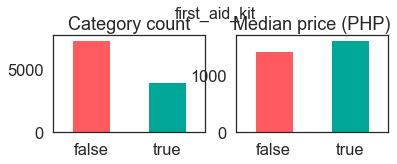

In [787]:
for col in df.loc[:,"waterfront":"first_aid_kit"].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

### Reviews

In [788]:
df1 = df.loc[:,"rating_cleanliness":"rating_value"].mean().to_frame().reset_index().rename(columns={'index':'rating_type',0:'average_rating'})
df1

rating_type  average_rating
0    rating_cleanliness        4.682021
1       rating_accuracy        4.736467
2  rating_communication        4.827237
3       rating_location        4.706216
4        rating_checkin        4.835561
5          rating_value        4.733234

Text(90.07499999999999, 0.5, 'Proince')

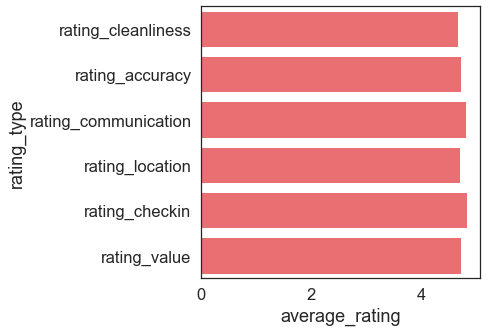

In [789]:
fig = plt.subplots(figsize=(5, 5))

# plot a bar chart
sns.barplot(
    y=df1['rating_type'], 
    x=df1['average_rating'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f');

ax1.set_title('Top 5 Provinces (with at least 10 listings) with the Highest Median Price per Night')
ax1.set_xlabel('Median Price per Night (in PHP)')
ax1.set_ylabel('Proince')

In [790]:
corr = pd.concat([df.loc[:,'rating_accuracy':'rating_value'],df['price_per_night']], axis=1).dropna().corr()

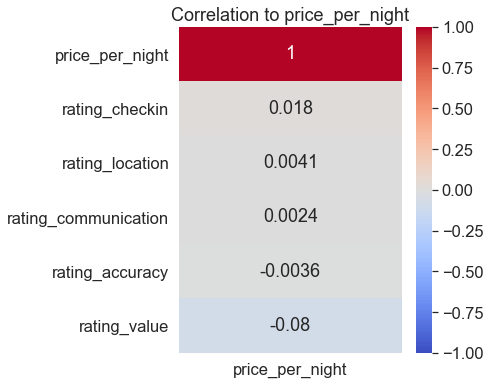

In [791]:
# Compute correlations
corr = pd.concat([df.loc[:,'rating_accuracy':'rating_value'],df['price_per_night']], axis=1).dropna().corr()
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,vmax=1,
            cmap='coolwarm',
            annot=True);

In [792]:
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
     return pearsonr(x,y)[1]
corr['significant'] = corr['price_per_night'] < 0.05
corr[['price_per_night', 'significant']]

price_per_night  significant
rating_accuracy             -0.003561         True
rating_communication         0.002369         True
rating_location              0.004063         True
rating_checkin               0.018192         True
rating_value                -0.079631         True
price_per_night              1.000000        False

### Description Tags

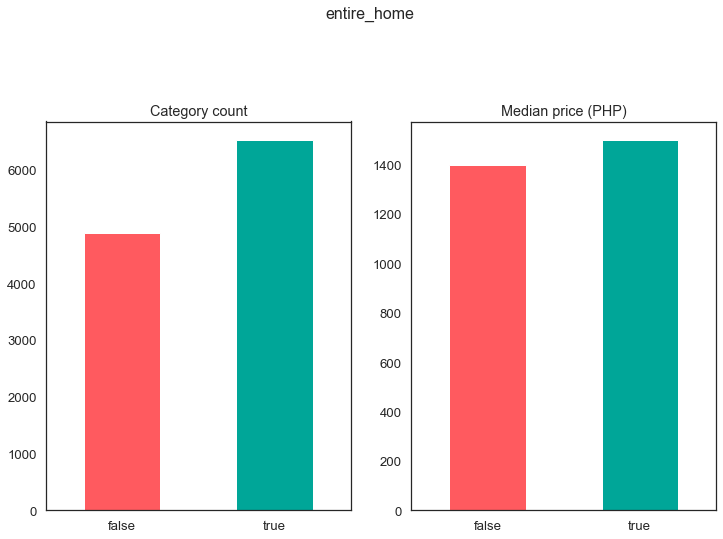

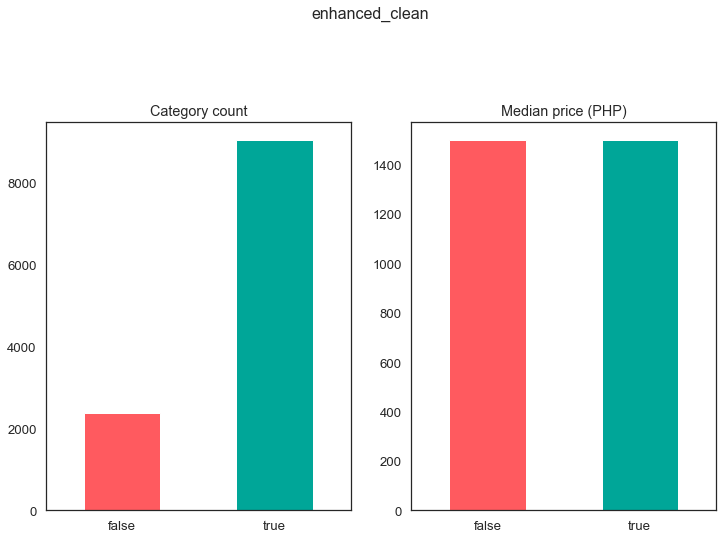

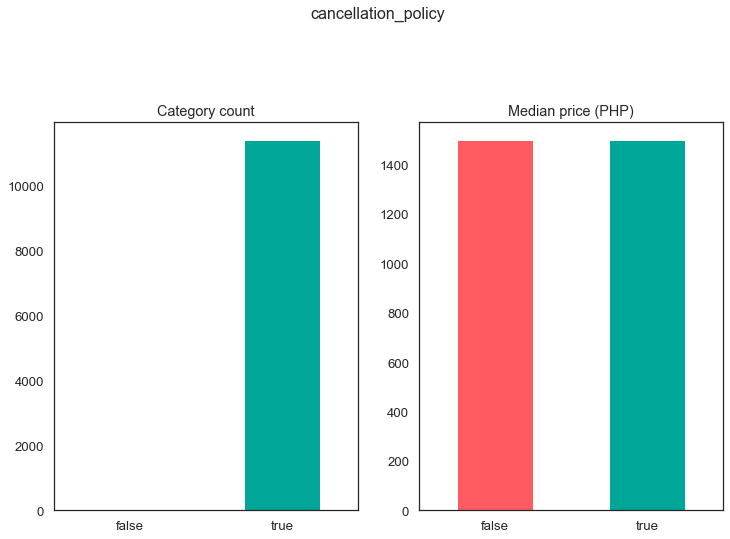

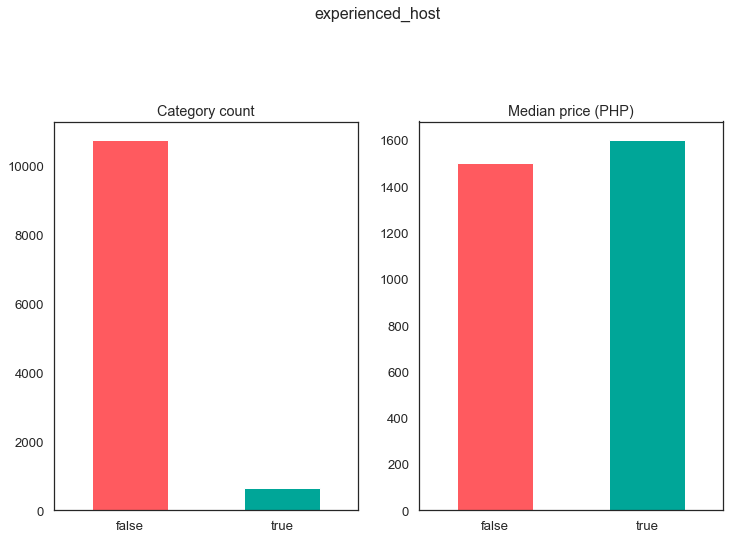

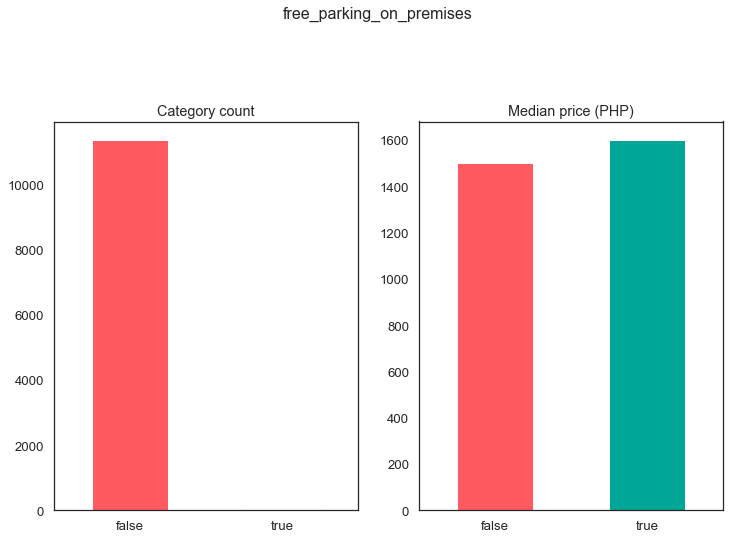

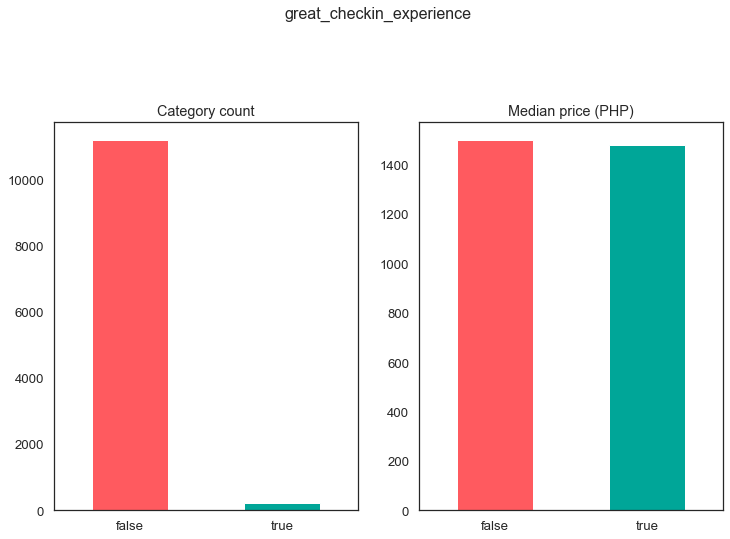

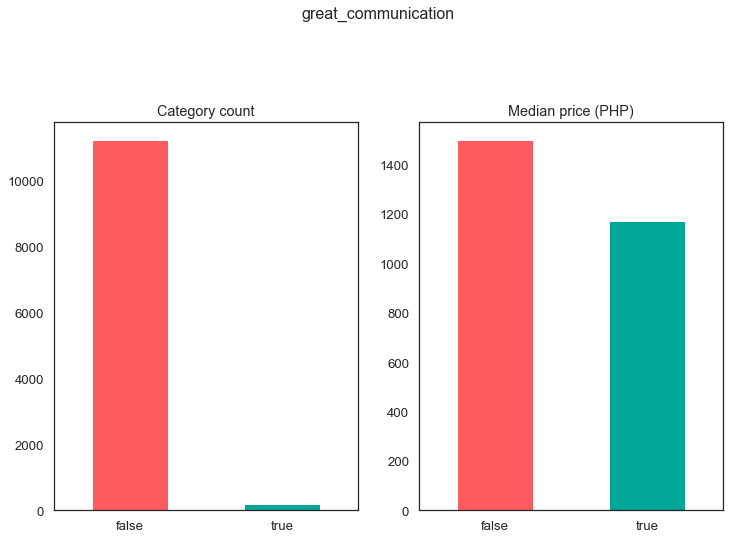

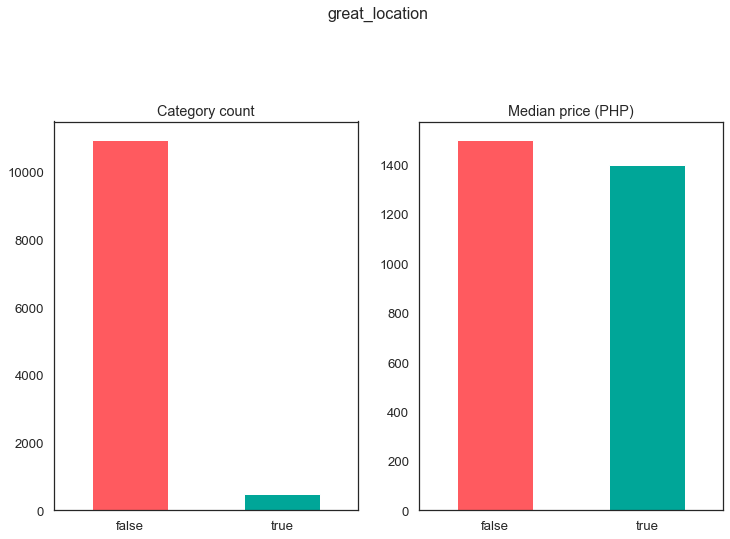

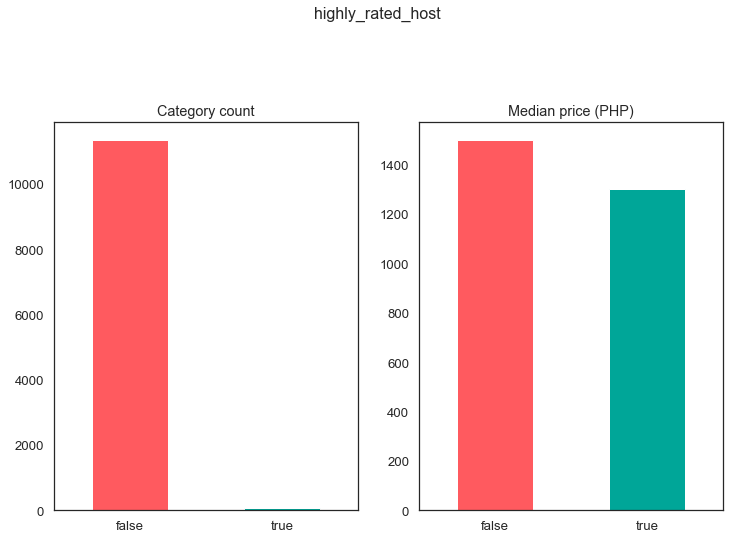

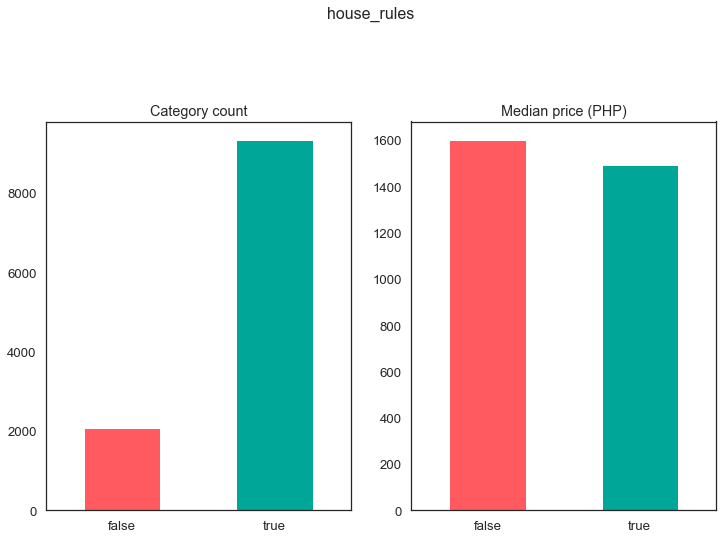

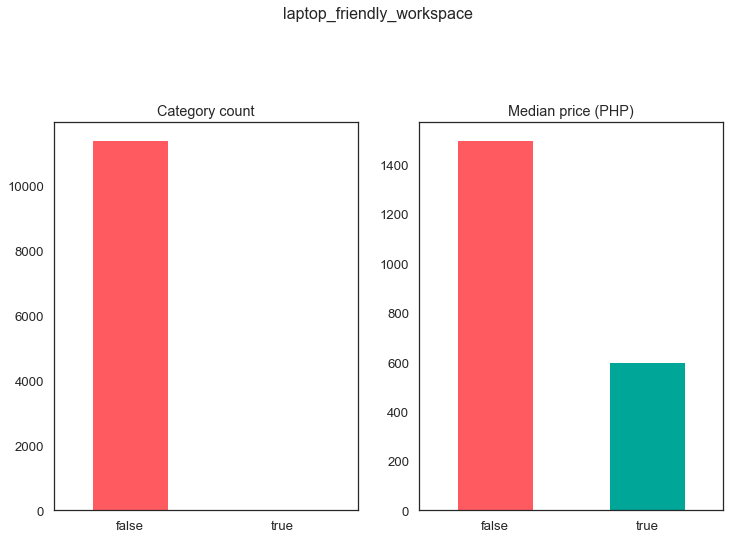

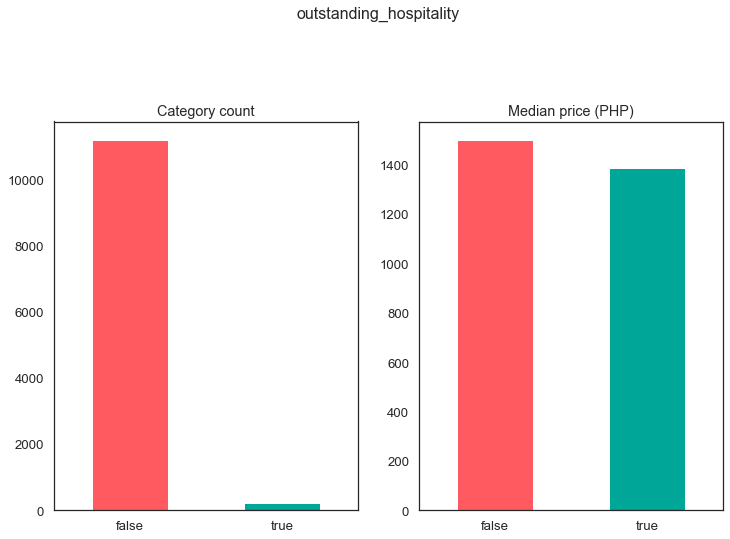

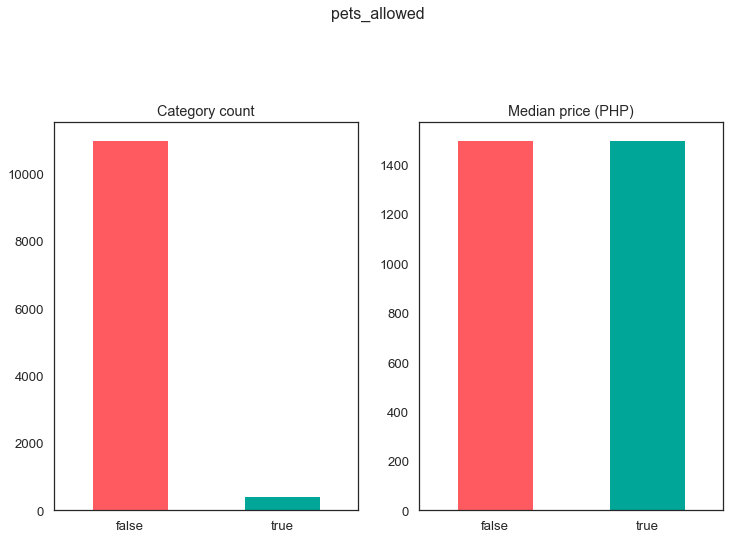

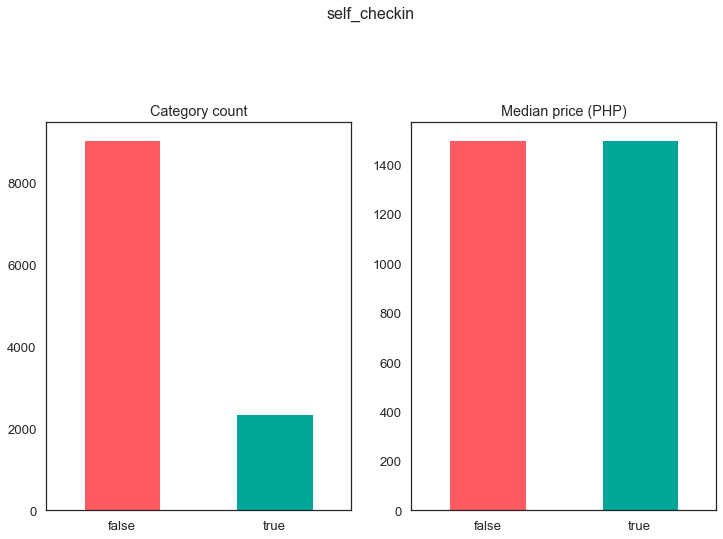

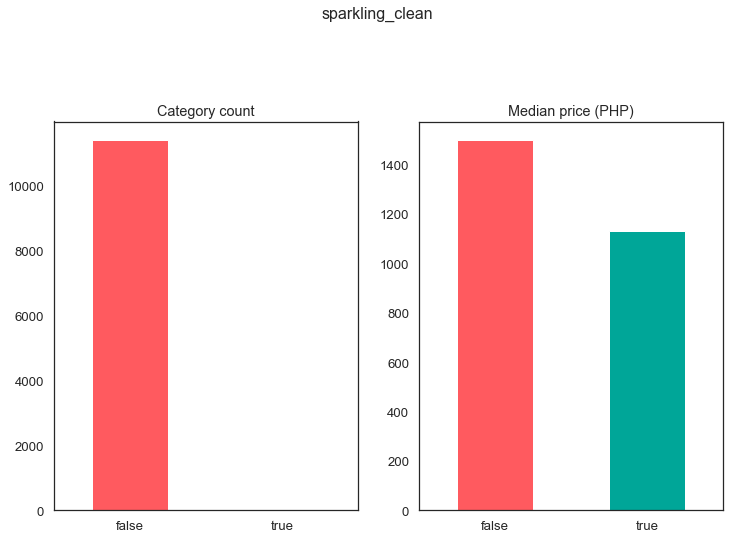

In [826]:
for col in df.loc[:,"entire_home":"sparkling_clean"].columns:
    binary_count_and_price_plot(col, figsize=(12,8))

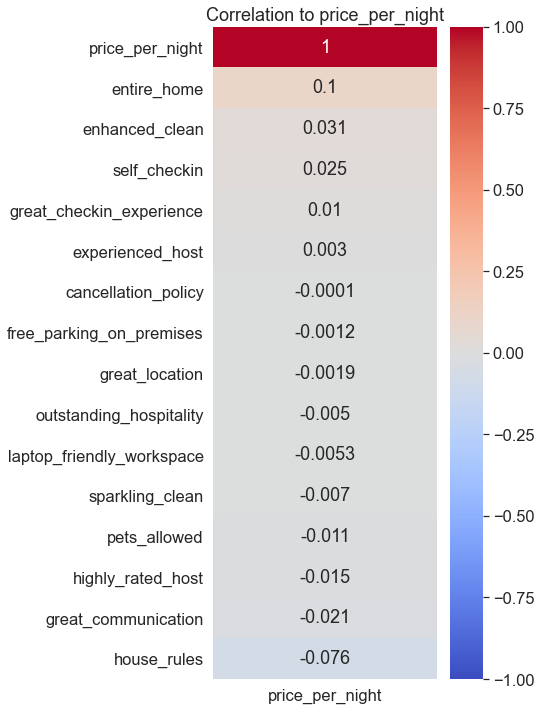

In [794]:
# Compute correlations
corr = pd.concat([df.loc[:,"entire_home":"sparkling_clean"],df['price_per_night']], axis=1).corr()
# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(5, 12))
ax.set_title('Correlation to price_per_night')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']].sort_values(by=['price_per_night'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### Superhost

In [795]:
df9 = df.groupby("superhost").agg({'price_per_night':'mean','url':'count'}).reset_index()
df9

superhost  price_per_night   url
0          0      2354.298246  8949
1          1      2227.979675  2460

Text(0, 0.5, 'Average price per night')

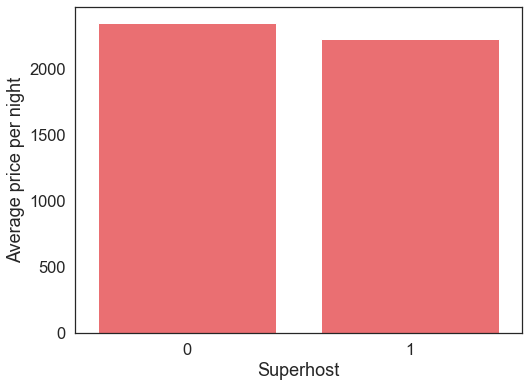

In [796]:
# Set the figure size
plt.figure(figsize=(8, 6))

# plot a bar chart
sns.barplot(
    y=df9['price_per_night'], 
    x=df9['superhost'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f');

plt.xlabel('Superhost')
plt.ylabel("Average price per night")

### Population, Area, Covid, Travelers

In [797]:
pd.concat([df.loc[:,'population':'covid_active'],df['price_per_night']], axis=1).corr()

population      area  travelers_2019  foreign_travelers  \
population           1.000000 -0.338228        0.894286           0.964468   
area                -0.338228  1.000000       -0.303437          -0.337824   
travelers_2019       0.894286 -0.303437        1.000000           0.902108   
foreign_travelers    0.964468 -0.337824        0.902108           1.000000   
covid_total          0.986821 -0.389781        0.877618           0.975110   
covid_active         0.985306 -0.387525        0.874712           0.978059   
price_per_night     -0.136287 -0.021777       -0.077052          -0.140096   

                   covid_total  covid_active  price_per_night  
population            0.986821      0.985306        -0.136287  
area                 -0.389781     -0.387525        -0.021777  
travelers_2019        0.877618      0.874712        -0.077052  
foreign_travelers     0.975110      0.978059        -0.140096  
covid_total           1.000000      0.998728        -0.135410  
covid_active          0.998728      1.000000        -0.139777  
price_per_night      -0.135410     -0.139777         1.000000

<AxesSubplot:>

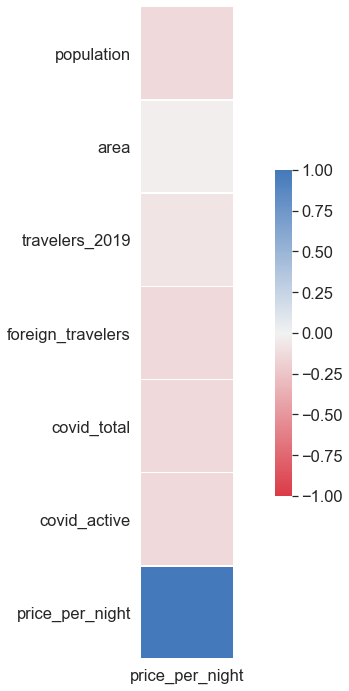

In [798]:
# Compute correlations
corr = pd.concat([df.loc[:,'population':'covid_active'],df['price_per_night']], axis=1).corr()

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price_per_night']], cmap=cmap, 
        square=True,  vmin=-1, vmax=1,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [799]:
response = df['price_per_night']
df.drop(columns=['price_per_night']).corrwith(response).sort_values(ascending=False)

guests                           0.452223
entire_villa                     0.387620
number_of_beds                   0.286439
number_of_bedrooms               0.261074
grill                            0.248280
Batangas                         0.221703
number_of_bathrooms              0.198538
garden                           0.176715
balcony                          0.147309
type_airbnb_label                0.139965
swimming_pool                    0.138710
indoor_games                     0.137528
first_aid_kit                    0.137120
Bataan                           0.136423
farm_stay                        0.124978
distance_airport_kms             0.119694
bathtub                          0.118201
latitude                         0.116838
within_750m_from_coast           0.113804
waterfront                       0.111593
coffee_maker                     0.103128
entire_home                      0.103035
Zambales                         0.099030
firepit                          0

In [800]:
df[['province', 'num_nearby_tourist_spots_5km', 'num_nearby_malls_5km', 'num_nearby_supermarkets_5km', 'num_nearby_restaurants_5km', 'num_nearby_public_transpo_5km']].groupby('province').count()

num_nearby_tourist_spots_5km  num_nearby_malls_5km  \
province                                                                  
Abra                                           10                    10   
Agusan del Norte                              132                   132   
Agusan del Sur                                  9                     9   
Aklan                                         298                   298   
Albay                                         275                   275   
Antique                                        54                    54   
Apayao                                          4                     4   
Aurora                                         22                    22   
Bataan                                        183                   183   
Batanes                                       188                   188   
Batangas                                      264                   264   
Benguet                                       302                   302   
Biliran                                        29                    29   
Bohol                                         188                   188   
Bukidnon                                       54                    54   
Bulacan                                        68                    68   
Cagayan                                        48                    48   
Caloocan City                                  17                    17   
Camarines Norte                                73                    73   
Camarines Sur                                 185                   185   
Camiguin                                      175                   175   
Capiz                                          42                    42   
Catanduanes                                    25                    25   
Cavite                                        281                   281   
Cebu                                          448                   448   
Compostela Valley                              15                    15   
Cotabato                                       15                    15   
Davao Occidental                                4                     4   
Davao Oriental                                 29                    29   
Davao del Norte                               138                   138   
Davao del Sur                                 365                   365   
Dinagat Islands                                16                    16   
Eastern Samar                                  37                    37   
Guimaras                                       36                    36   
Ifugao                                         31                    31   
Ilocos Norte                                  208                   208   
Ilocos Sur                                    259                   259   
Iloilo                                        281                   281   
Isabela                                        48                    48   
Kalinga                                         7                     7   
La Union                                      251                   251   
Laguna                                        153                   153   
Lanao del Norte                                58                    58   
Lanao del Sur                                   3                     3   
Las Piñas City                                 65                    65   
Leyte                                         228                   228   
Maguindanao                                     6                     6   
Makati City                                   305                   305   
Malabon City                                    3                     3   
Mandaluyong City                              155                   155   
Manila City                                   130                   130   
Marikina City                                 

## Conclusion

Based on our findings, first, **the More the Merrier!**

With the use of Pearson Correlation Test, the number of guests has the strongest relationship with price per night. Along with that, our model also suggests that it is the top predictor for the Airbnb pricing. As the number of guests increases, price also generally increases. We do recommend increasing the guest capacity by adding more beds.


Second, **Spatial is Special!**

Among the spatial features that we have added from our proximity analysis, the distance from the airport is the most correlated feature with price per night and is also an important predictor for pricing. Most of the listings are near the coastline and far from the airports. These listings tend to have higher price per night as compared to those not within the coastline. Listings near the coastline gives touristic ambience which gives an additive value to the property.


Third, **You’re in the right place!**

Batangas has the most expensive median price per night followed by Bataan, Marinduque, Batanes and Zambales. One thing that we have noticed is that median prices in mainland Luzon are generally higher compared to Visayas and Mindanao. Also, compared to the rest of mainland Luzon, the median prices in NCR are generally lower.


Lastly, **Amenity is a necessity!**

The most common amenities that an Airbnb host should have are aircon, Wi-Fi, parking and clothes storage. A rare amenity “must have” which can help increase pricing is providing your guests with board games. Adding a grill can increase pricing because of its positive correlation with price. Kettle, utensils, first aid kits, and hygiene kits are amenities that a host can easily provide which can also add value to the price. Investing on having a hair dryer, iron, microwave, and providing a breakfast meal for your guests are also the recommended ways to increase your listing price.